In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd

print('loading the dataset')
df = pd.read_csv('D:\Spring_2017\machine learning\homework\hw1\hw1-sgd\hw1-data.csv', delimiter=',')
X = df.values[:,:-1]
y = df.values[:,-1]

print('Split into Train and Test')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =100, random_state=10)
print(X_train.shape)
print("Scaling all to [0, 1]")
X_train, X_test = feature_normalization(X_train, X_test)
print(X_train.shape)
X_train = np.hstack((X_train, np.ones((X_train.shape[0], 1))))  # Add bias term
X_test = np.hstack((X_test, np.ones((X_test.shape[0], 1)))) # Add bias term

loading the dataset
Split into Train and Test
(100, 48)
Scaling all to [0, 1]
(100, 48)


In [163]:
print(X.shape)
print(X_train.shape)

(200, 48)
(100, 49)


In [4]:
import numpy as np
def feature_normalization(train, test):
    max_train = train.max(axis=0)
    min_train = train.min(axis=0)
    train_normalized = (train-min_train)/(max_train-min_train)
    test_normalized = (test-min_train)/(max_train-min_train) 
    return train_normalized, test_normalized

def compute_square_loss_gradient(X, y, theta):
    grad = np.zeros(X.shape[1])
    grad = np.dot(X.T,np.dot(X,theta)-y)/X.shape[0]
    #for i in range(X.shape[1]):
    #    grad[i]=sum((np.dot(X,theta)-y)*X[:,i])/X.shape[0]
    return grad

def compute_square_loss(X, y, theta):
    loss = 0 #initialize the square_loss
    residual = np.dot(X,theta)-y
    residual2 = residual**2
    loss = np.sum(residual2)/(2*X.shape[0])
    return loss

In [6]:
####################################
#### Batch Gradient Descent
def batch_grad_descent(X, y, alpha=0.1, num_iter=1000, check_gradient=False):
    num_instances, num_features = X.shape[0], X.shape[1]
    theta_hist = np.zeros((num_iter+1, num_features))  #Initialize theta_hist
    loss_hist = np.zeros(num_iter+1) #initialize loss_hist
    theta = np.ones(num_features) #initialize theta
    #TODO
    theta_hist[0] = theta
    loss_hist[0] = compute_square_loss(X, y, theta_hist[0])
    #print(theta_hist[0])
    for i in range(1,num_iter+1):
        theta_hist[i] = theta_hist[i-1]-alpha*compute_square_loss_gradient(X, y, theta_hist[i-1])
        #print(theta_hist[i])
        loss_hist[i] = compute_square_loss(X, y, theta_hist[i])
    return theta_hist, loss_hist

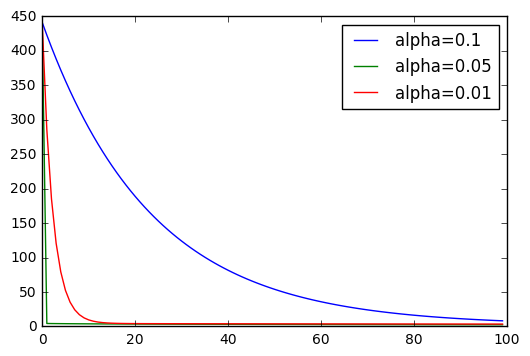

In [7]:
import matplotlib.pyplot as plt
a1, b1 = batch_grad_descent(X_train, y_train, alpha=0.5, num_iter=1000, check_gradient=False)
a2, b2 = batch_grad_descent(X_train, y_train, alpha=0.1, num_iter=1000, check_gradient=False)
a3, b3 = batch_grad_descent(X_train, y_train, alpha=0.05, num_iter=1000, check_gradient=False)
a4, b4 = batch_grad_descent(X_train, y_train, alpha=0.01, num_iter=1000, check_gradient=False)
x = list(range(100))
plt.plot(x, b2[0:100])
plt.plot(x, b3[0:100])
plt.plot(x, b4[0:100])
plt.legend(['alpha=0.1', 'alpha=0.05', 'alpha=0.01'], loc='upper right')
plt.show()


In [187]:
b1

array([  4.41434261e+02,   3.45797755e+04,   2.73516107e+06, ...,
                    nan,              nan,              nan])